In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Axes: xlabel='Date', ylabel='Close'>

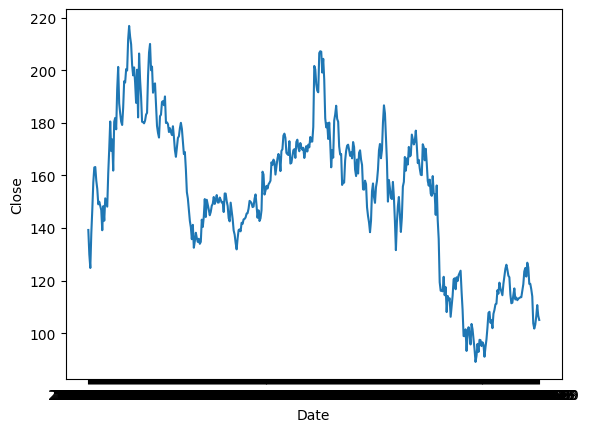

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/datasets/ABNB_stock/ABNB_stock.csv')

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df, ax=ax)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       454 non-null    object 
 1   Open       454 non-null    float64
 2   High       454 non-null    float64
 3   Low        454 non-null    float64
 4   Close      454 non-null    float64
 5   Adj Close  454 non-null    float64
 6   Volume     454 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 25.0+ KB


<Axes: xlabel='Date', ylabel='Close'>

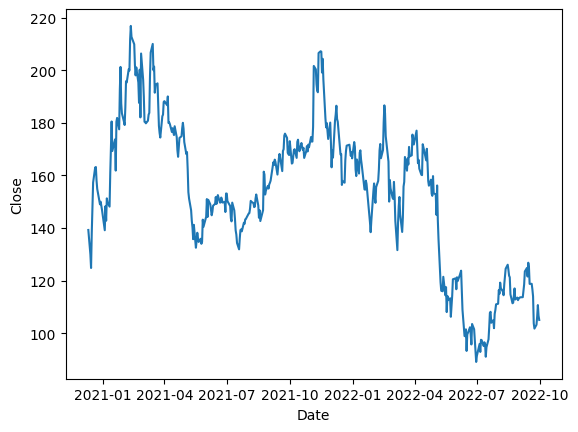

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df, ax=ax)

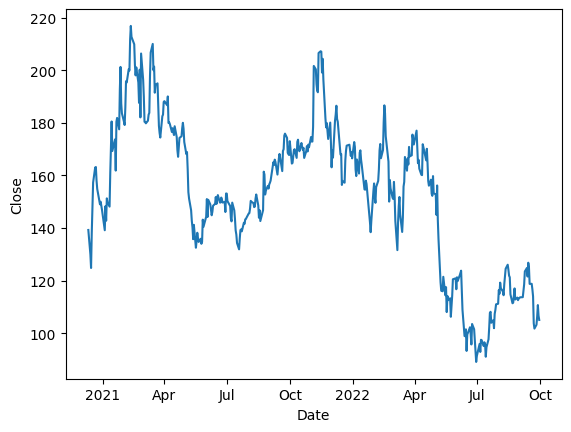

In [5]:
import matplotlib as mpl

fig, ax = plt.subplots()
sns.lineplot(x='Date', y='Close', data=df, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [6]:
import plotly.express as px

df = pd.read_csv('/content/drive/MyDrive/datasets/ABNB_stock/ABNB_stock.csv')

fig = px.line(df, x='Date', y='Close', width=500, height=400)
fig.show()

In [7]:
fig = px.line(df, x='Date', y='Close', width=500, height=400)
fig.update_xaxes(tickformat='%Y-%m-%d')
fig.show()

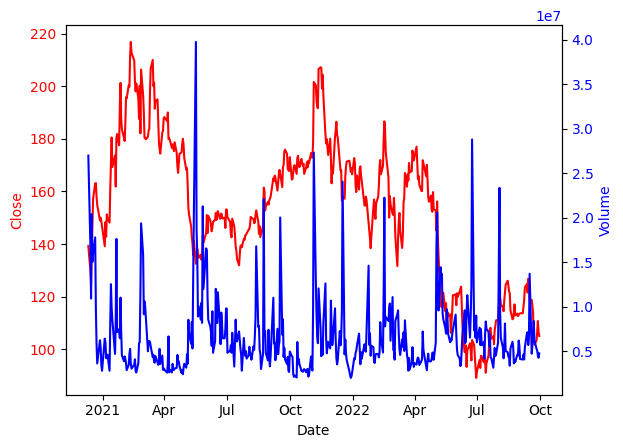

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

df = pd.read_csv('/content/drive/MyDrive/datasets/ABNB_stock/ABNB_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])

fig, ax = plt.subplots()
ax2 = ax.twinx()
sns.lineplot(x='Date', y='Close', data=df, ax=ax, color='red')
sns.lineplot(x='Date', y='Volume', data=df, ax=ax2, color='blue')

ax.tick_params(axis='y', labelcolor='red')
ax.yaxis.label.set_color('red')

ax2.tick_params(axis='y', labelcolor='blue')
ax2.yaxis.label.set_color('blue')

ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [9]:
ax.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('blue')

In [10]:
df = pd.read_csv('/content/drive/MyDrive/datasets/ABNB_stock/ABNB_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['High-Low'] = df['High'] - df['Low']

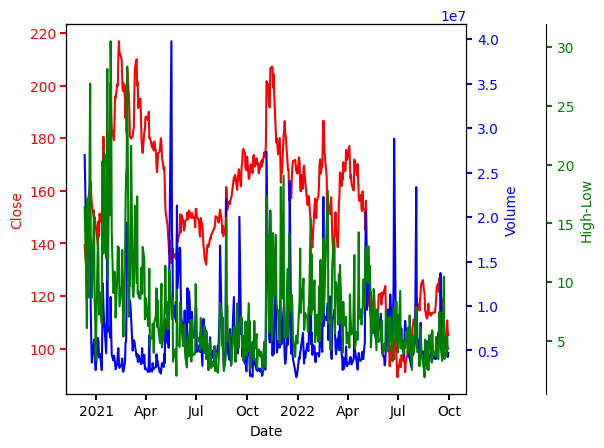

In [11]:
fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

ax2 = ax.twinx()
ax3 = ax.twinx()

# 세번째 y축(ax3)을 그래프의 바깥으로 옮깁니다.
ax3.spines.right.set_position(("axes", 1.2))

sns.lineplot(x='Date', y='Close', data=df, ax=ax, color='red')
sns.lineplot(x='Date', y='Volume', data=df, ax=ax2, color='blue')
sns.lineplot(x='Date', y='High-Low', data=df, ax=ax3, color='green')

ax.yaxis.label.set_color('red')
ax2.yaxis.label.set_color('blue')
ax3.yaxis.label.set_color('green')

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors='red', **tkw)
ax2.tick_params(axis='y', colors='blue', **tkw)
ax3.tick_params(axis='y', colors='green', **tkw)
ax.tick_params(axis='x', **tkw)

ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [12]:
from plotly.subplots import make_subplots
df = pd.read_csv('/content/drive/MyDrive/datasets/ABNB_stock/ABNB_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['High-Low'] = df['High'] - df['Low']

fig = make_subplots(specs=[[{"secondary_y": True}]])

subfig1 = px.line(df, x='Date', y='Close')
subfig1.update_traces(line_color='red')
subfig2 = px.line(df, x='Date', y='Volume')
subfig2.update_traces(line_color='blue')

subfig2.update_traces(yaxis='y2')

fig.add_traces(subfig1.data + subfig2.data)

fig.layout.xaxis.title = 'Date'
fig.layout.yaxis.title = 'Close'
fig.layout.yaxis2.title = 'Volume'
fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'

fig.update_layout(width=500, height=400)
fig.show()

In [13]:
import plotly.graph_objects as go

df = pd.read_csv('/content/drive/MyDrive/datasets/ABNB_stock/ABNB_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['High-Low'] = df['High'] - df['Low']

fig = make_subplots()
fig.add_trace(
    go.Scatter(
        x=df['Date'], y=df['Close'], name='Close',
        mode='lines', yaxis='y', line={'color':'red'},
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Date'], y=df['Volume'], name='Volume',
        mode='lines', yaxis='y2', line={'color':'blue'},
    )
)

fig.add_trace(
    go.Scatter(
        x=df['Date'], y=df['High-Low'], name='High-Low',
        mode='lines', yaxis='y3', line={'color':'green'},
    )
)

fig.update_layout(
    yaxis = dict(title="Close"),
    yaxis2 = dict(
        position = 1, title="Volume",
        side = "right", anchor="free", overlaying="y"
    ),
    yaxis3 = dict(
        title = "High-Low", side="right", anchor="x",
        overlaying="y"
    ),
    xaxis = dict(title="Date", domain=[.1, .85]),
    width=600, height=400
)

fig.layout.yaxis.color = 'red'
fig.layout.yaxis2.color = 'blue'
fig.layout.yaxis3.color = 'green'

fig.show()

In [14]:
df = pd.read_csv('/content/drive/MyDrive/datasets/CO2_emissions/CO2_Emissions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

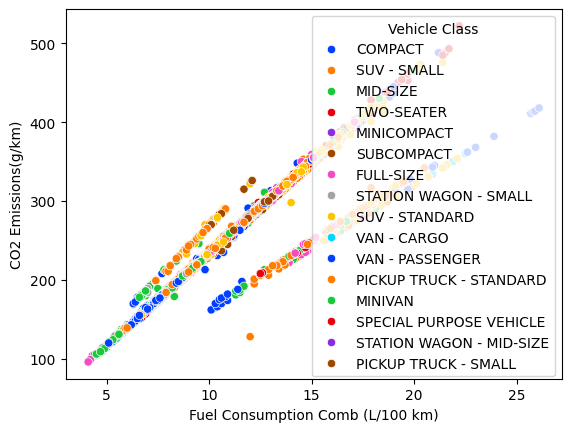

In [15]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    data=df, hue='Vehicle Class', palette='bright',
    ax=ax
)

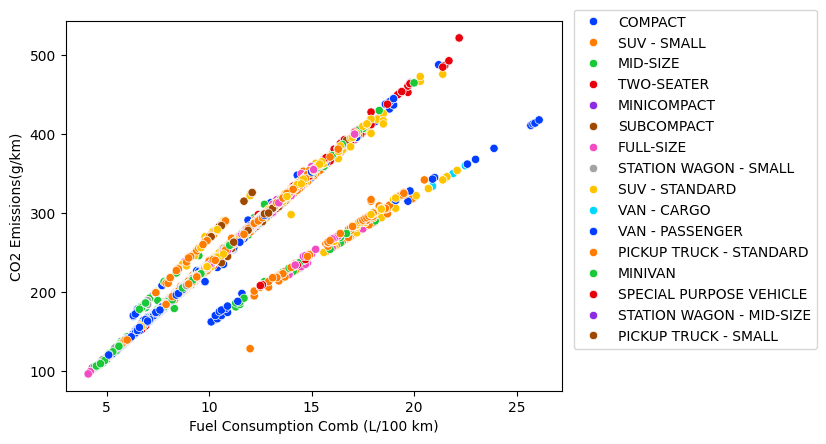

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    data=df, hue='Vehicle Class', palette='bright',
    ax=ax
)
ax.legend(bbox_to_anchor=(1.01, 1.05))

In [17]:
fig = px.scatter(
    df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)',
    color = 'Vehicle Class', width=700, height=500
)
fig.update_layout(legend_x=1.2, legend_y=1)
fig.show()

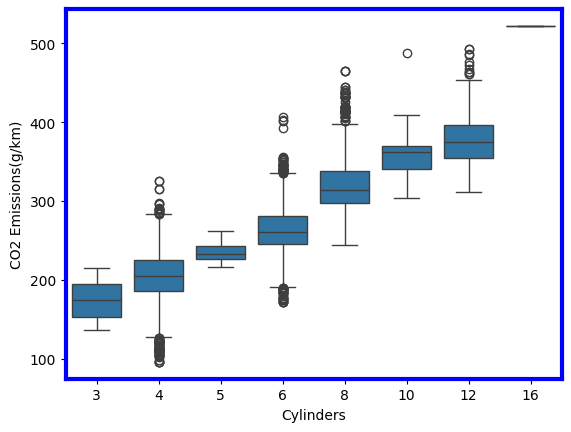

In [18]:
df = pd.read_csv('/content/drive/MyDrive/datasets/CO2_emissions/CO2_Emissions.csv')

fig, ax = plt.subplots()
sns.boxplot(
    x='Cylinders', y='CO2 Emissions(g/km)',
    data=df, ax=ax
)

spines = ['left', 'right', 'top', 'bottom']
for spine in spines:
  ax.spines[spine].set_color('blue')
  ax.spines[spine].set_linewidth(3)

In [19]:
fig = px.box(df, x='Cylinders', y='CO2 Emissions(g/km)', width=500, height=400)
fig.update_xaxes(showline=True, linecolor="black", linewidth=3, mirror=True)
fig.update_yaxes(showline=True, linecolor='black', linewidth=4, mirror=True)
fig.show()

Text(10, 130, 'fuel type ethanol emits less CO2')

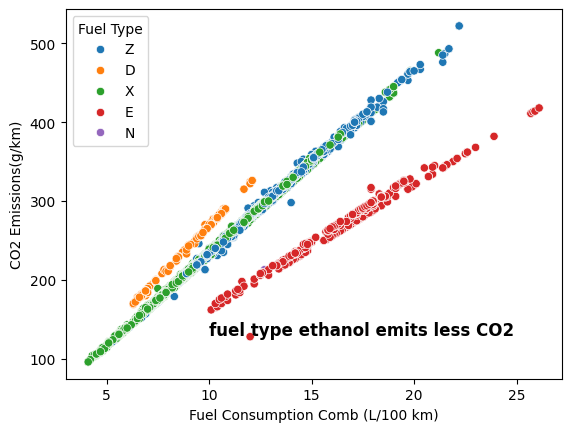

In [20]:
df = pd.read_csv('/content/drive/MyDrive/datasets/CO2_emissions/CO2_Emissions.csv')

fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)', data=df, ax=ax, hue='Fuel Type'
)
ax.text(
    x=10, y=130,
    s='fuel type ethanol emits less CO2',
    fontdict={'fontsize':12, 'weight':'bold'}
)

Text(0.3, 0.12, 'fuel type ethanol emits less CO2')

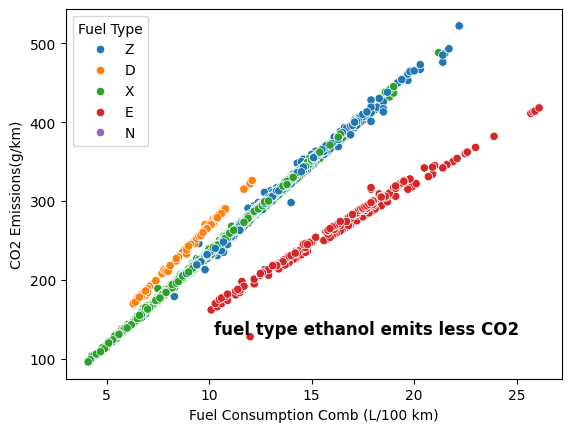

In [21]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)', data=df, ax=ax, hue='Fuel Type'
)
ax.text(
    x=0.3, y=0.12,
    s='fuel type ethanol emits less CO2',
    fontdict={'fontsize':12, 'weight':'bold'},
    transform=ax.transAxes
)

Text(21, 310, 'ethanol is efficient')

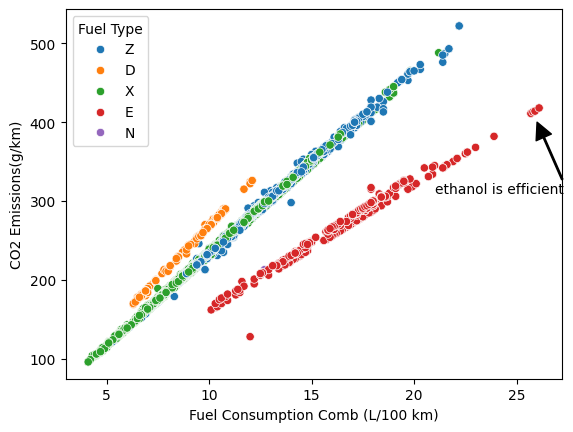

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)', data=df, ax=ax, hue='Fuel Type'
)
ax.annotate(
    text='ethanol is efficient', xy=(26, 400),
    xytext=(21,310), arrowprops = {'color':'black', 'width':1}
)

Text(0.73, 0.5, 'ethanol is efficient')

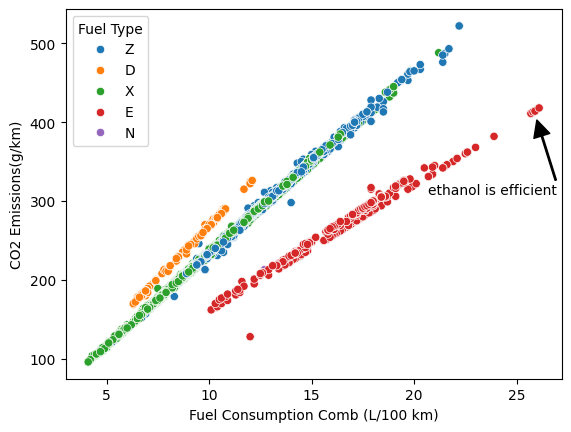

In [23]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)', data=df, ax=ax, hue='Fuel Type'
)
ax.annotate(
    text='ethanol is efficient', xy=(0.95, 0.7),
    xytext=(0.73, 0.5), arrowprops={'color':'black', 'width':1},
    xycoords=ax.transAxes
)

In [24]:
fig = px.scatter(
    df, x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)', width=500, height=400,
    color='Fuel Type'
)
fig.add_annotation(
    x=20, y=130, text='<b>fuel type ethanol emits less CO2</b>',
    showarrow=False
)
fig.add_annotation(
    x=0.9, xref='x domain', y=0.75, yref='y domain', text='ethanol is efficient',
    showarrow=True, arrowhead=2
)
fig.show()

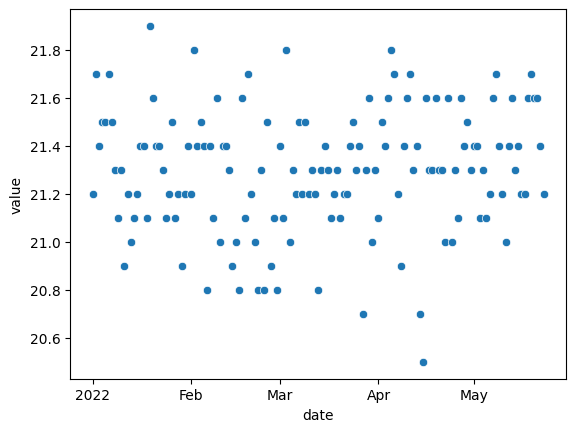

In [25]:
df= pd.read_csv('/content/drive/MyDrive/datasets/product_inspection/product_inspection.csv')
df['date'] = pd.to_datetime(df['date'])

df = df.query('inspection_step == "A"')

fig, ax = plt.subplots()
sns.scatterplot(x='date', y='value', data=df, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

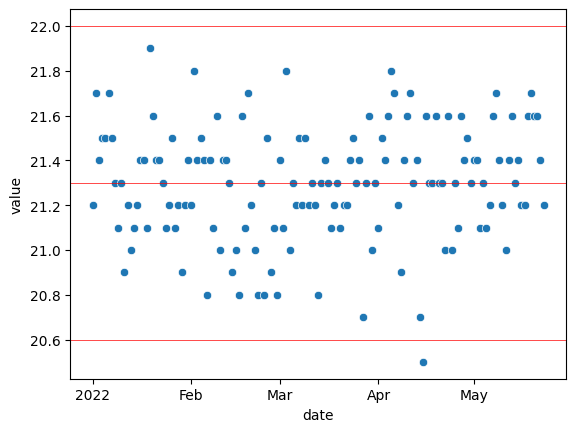

In [26]:
fig, ax = plt.subplots()
sns.scatterplot(x='date', y='value', data=df, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.axhline(df['lower_spec'].iloc[-1], color='red', linewidth=0.5)
ax.axhline(df['target'].iloc[-1], color='red', linewidth=0.5)
ax.axhline(df['upper_spec'].iloc[-1], color='red', linewidth=0.5)

In [27]:
fig = px.scatter(df, x='date', y='value', width=500, height=400)
fig.add_hline(df['lower_spec'].iloc[-1], line_color='red', line_width=0.5)
fig.add_hline(df['target'].iloc[-1], line_color='red', line_width=0.5)
fig.add_hline(df['upper_spec'].iloc[-1], line_color='red', line_width=0.5)
fig.show()

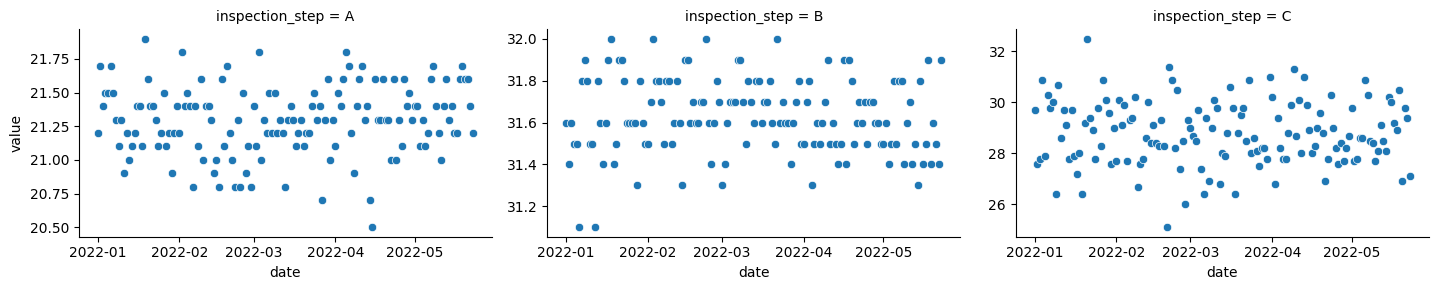

In [28]:
df = pd.read_csv('/content/drive/MyDrive/datasets/product_inspection/product_inspection.csv')
df['date'] = pd.to_datetime(df['date'])

g = sns.FacetGrid(df, sharex=False, sharey=False, col='inspection_step', aspect=1.6)
g.map_dataframe(sns.scatterplot, x='date', y='value')

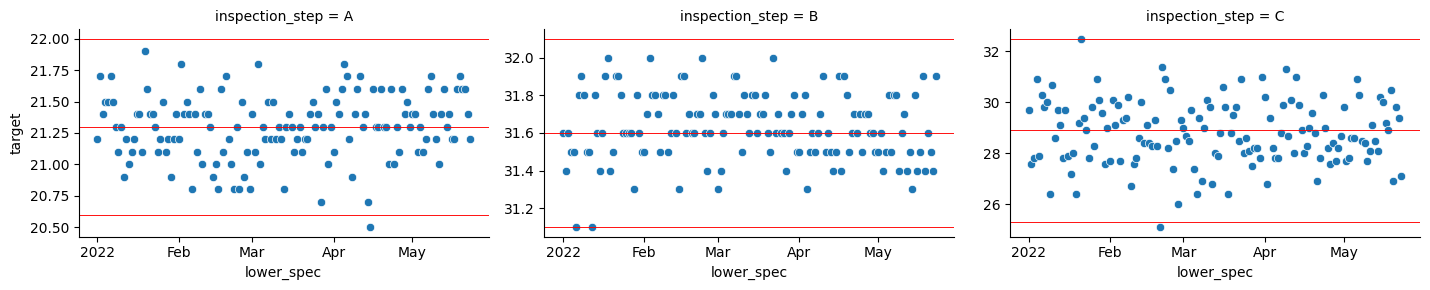

In [30]:
import matplotlib as mpl
def custom(lower_spec, target, upper_spec, **kws):
  ax = plt.gca()

  ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
  ax.axhline(target.iloc[-1], color='red', linewidth=0.5)
  ax.axhline(upper_spec.iloc[-1], color='red', linewidth=0.5)

  ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

g.map(custom, 'lower_spec', 'target', 'upper_spec')
plt.show()

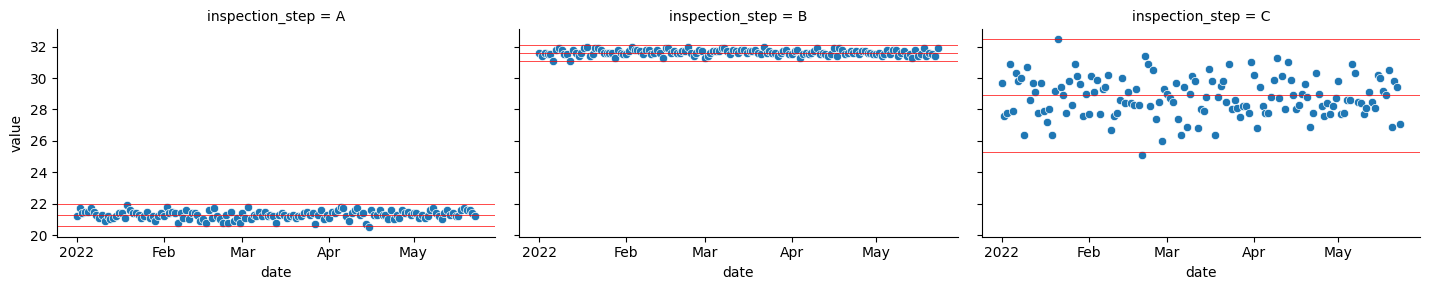

In [31]:
g = sns.FacetGrid(df, sharex=False, col='inspection_step', aspect=1.6)
g.map_dataframe(sns.scatterplot, x='date', y='value')

for ax in g.axes.flat:
  inspection_step = ax.get_title()[-1]
  temp_df = df.loc[df['inspection_step'] == inspection_step]

  ax.axhline(temp_df['lower_spec'].iloc[-1], color='red', linewidth=0.5)
  ax.axhline(temp_df['upper_spec'].iloc[-1], color='red', linewidth=0.5)
  ax.axhline(temp_df['target'].iloc[-1], color='red', linewidth=0.5)

  ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

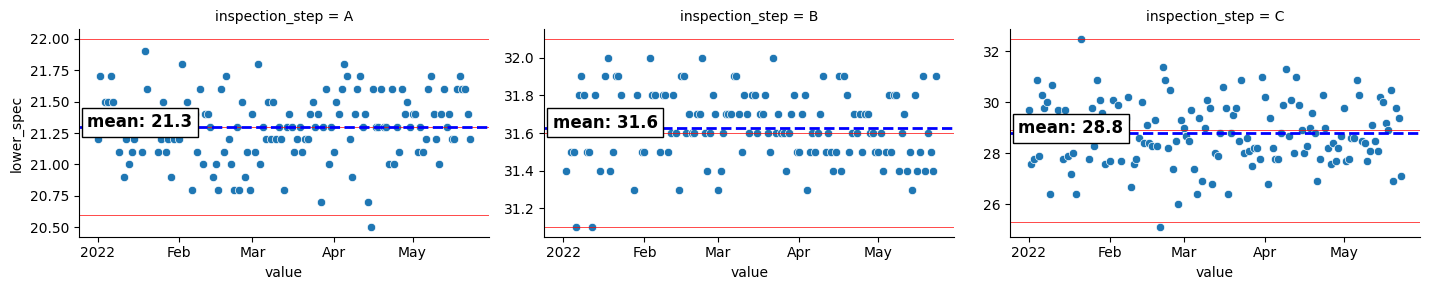

In [32]:
import matplotlib.transforms as transforms

g = sns.FacetGrid(df, sharex=False, sharey=False, col='inspection_step', aspect=1.6)
g.map_dataframe(sns.scatterplot, x='date', y='value')

def custom(value, lower_spec, target, upper_spec, **kws):
  ax = plt.gca()

  ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
  ax.axhline(target.iloc[-1], color='red', linewidth=0.5)
  ax.axhline(upper_spec.iloc[-1], color='red', linewidth=0.5)

  ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

  mean = value.mean()
  ax.axhline(mean, color='blue', linestyle='--', linewidth=2)

  trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
  ax.text(x=0.02, y=mean, s='mean: {:.1f}'.format(mean),
          fontdict={'fontsize':12, 'weight':'bold'}, bbox={'facecolor':'white'},
          transform=trans, ha='left')

g.map(custom, 'value', 'lower_spec', 'target', 'upper_spec')

In [33]:
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step')
print(fig.layout.annotations)

(layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=A',
    'x': 0.15999999999999998,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=B',
    'x': 0.49999999999999994,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}), layout.Annotation({
    'font': {},
    'showarrow': False,
    'text': 'inspection_step=C',
    'x': 0.8399999999999999,
    'xanchor': 'center',
    'xref': 'paper',
    'y': 1.0,
    'yanchor': 'bottom',
    'yref': 'paper'
}))


In [34]:
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df['inspection_step'].nunique()):
  step = fig.layout.annotations[idx].text.split('=')[1]
  fig.add_hline(
      y=df.query('inspection_step == @step')['lower_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['upper_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['target'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

In [36]:
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df['inspection_step'].nunique()):
  step = fig.layout.annotations[idx].text.split('=')[1]
  fig.add_hline(
      y=df.query('inspection_step == @step')['lower_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['upper_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['target'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )

  med = df.query('inspection_step == @step')['value'].median()
  fig.add_hline(
      y=med,
      line_color='black', line_width=3, line_dash='dot', row=1, col=idx+1
  )

  fig.add_annotation(
      text='median: {:.1f}'.format(med),
      showarrow=False, bordercolor='black', borderwidth=1, bgcolor='rgb(256,256,256)',
      x=0.02, y=med, xref='x domain', row=1, col=idx+1,
  )

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

In [37]:
df = pd.read_csv('/content/drive/MyDrive/datasets/product_inspection/product_inspection.csv')
df['date'] = pd.to_datetime(df['date'])

df['spec_out'] = (df['value'] > df['upper_spec']) | (df['value'] < df['lower_spec'])

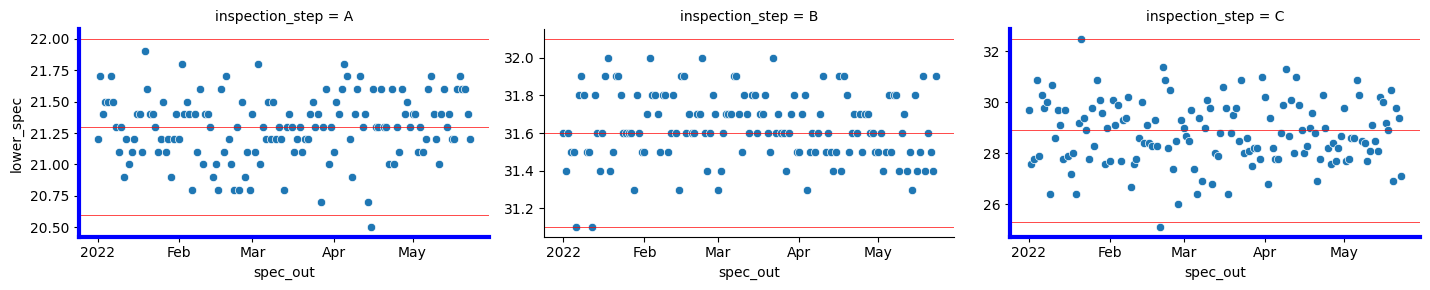

In [38]:
g = sns.FacetGrid(df, sharex=False, sharey=False, col='inspection_step', aspect=1.6)
g.map_dataframe(sns.scatterplot, x='date', y='value')

def custom(value, lower_spec, target, upper_spec, **kws):
  ax = plt.gca()

  ax.axhline(lower_spec.iloc[-1], color='red', linewidth=0.5)
  ax.axhline(target.iloc[-1], color='red', linewidth=0.5)
  ax.axhline(upper_spec.iloc[-1], color='red', linewidth=0.5)

  ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

def if_spec_out(spec_out, **kws):
  if spec_out.sum() > 0:
    ax = plt.gca()
    spines = ['left', 'bottom']
    for spine in spines:
      ax.spines[spine].set_color('blue')
      ax.spines[spine].set_linewidth(3)

g.map(custom, 'value', 'lower_spec', 'target', 'upper_spec')
g.map(if_spec_out, 'spec_out')

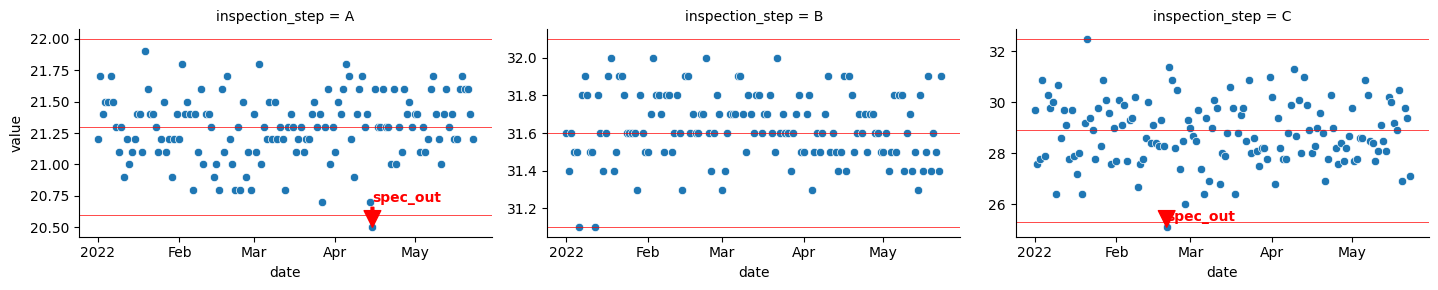

In [39]:
g = sns.FacetGrid(df, sharex=False, sharey=False, col='inspection_step', aspect=1.6)
g.map_dataframe(sns.scatterplot, x='date', y='value')

for ax in g.axes.flat:
  title = ax.get_title()[-1]
  temp_df = df.query('inspection_step == @title')

  ax.axhline(temp_df['lower_spec'].iloc[-1], color='red', linewidth=0.5)
  ax.axhline(temp_df['target'].iloc[-1], color='red', linewidth=0.5)
  ax.axhline(temp_df['upper_spec'].iloc[-1], color='red', linewidth=0.5)

  ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

  spec_out_df = temp_df.query('spec_out != 0')
  if len(spec_out_df) > 0:
    for idx in range(len(spec_out_df)):
      ax.annotate(
          xy=(spec_out_df.iloc[idx]['date'], spec_out_df.iloc[idx]['value']),
          xytext=(spec_out_df.iloc[idx]['date'], spec_out_df.iloc[idx]['value']*1.01),
          text='spec_out', arrowprops={'color':'red', 'width':2}, color='red', weight='bold'
      )

In [40]:
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df['inspection_step'].nunique()):
  step = fig.layout.annotations[idx].text.split('=')[1]
  fig.add_hline(
      y=df.query('inspection_step == @step')['lower_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['upper_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['target'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )

  if df.query('inspection_step == @step')['spec_out'].sum() > 0:
    fig.update_xaxes(showline=True, linecolor='black', linewidth=3, mirror=True, row=1, col=idx+1)
    fig.update_yaxes(showline=True, linecolor='black', linewidth=4, mirror=True, row=1, col=idx+1)

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

In [41]:
fig = px.scatter(df, x='date', y='value', facet_col='inspection_step', facet_col_spacing=0.05)

for idx in range(df['inspection_step'].nunique()):
  step = fig.layout.annotations[idx].text.split('=')[1]
  fig.add_hline(
      y=df.query('inspection_step == @step')['lower_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['upper_spec'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )
  fig.add_hline(
      y=df.query('inspection_step == @step')['target'].iloc[-1],
      line_color='red', line_width=0.5, row=1, col=idx+1
  )

  spec_out_df = df.query('inspection_step == @step and spec_out != 0')
  if len(spec_out_df) > 0:
    for jdx in range(len(spec_out_df)):
      fig.add_annotation(
          text='spec out', x=spec_out_df.iloc[jdx]['date'], y=spec_out_df.iloc[jdx]['value'],
          row=1, col=idx+1, arrowcolor='red', font={'color':'red'}
      )

fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True)
fig.show()

<Axes: xlabel='horsepower', ylabel='weight'>

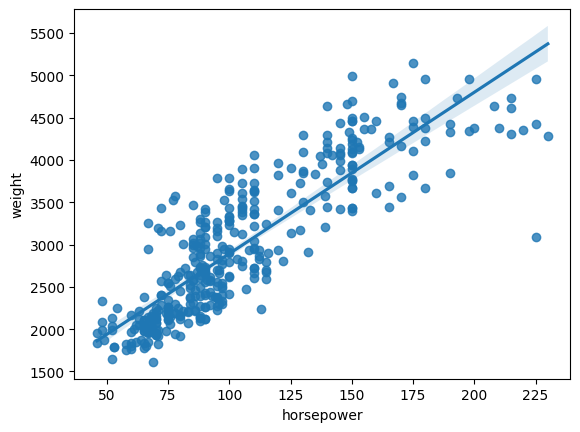

In [42]:
df = sns.load_dataset('mpg')

fig, ax = plt.subplots()
sns.regplot(x='horsepower', y='weight', data=df, ax=ax)

In [43]:
from scipy.stats import linregress

s, i, r, p, se = linregress(df['horsepower'], df['weight'])
print('y={:.2f}x+{:.2f}, R^2={:.2f}'.format(s, i, r**2))

y=nanx+nan, R^2=nan


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


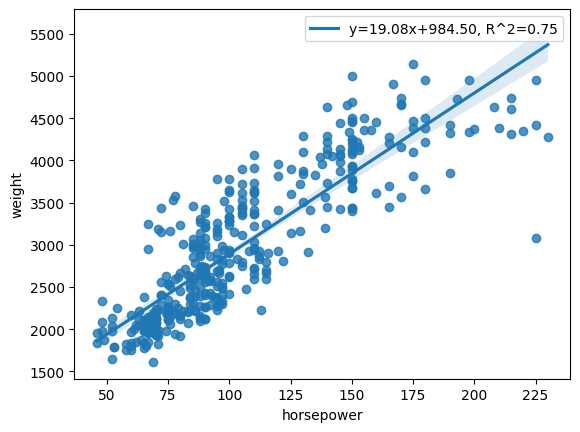

In [45]:
df = df.dropna()
s, i, r, p, se = linregress(df['horsepower'], df['weight'])

fig, ax = plt.subplots()
sns.regplot(
    x='horsepower', y='weight', data=df, ax=ax,
    line_kws={'label':'y={:.2f}x+{:.2f}, R^2={:.2f}'.format(s, i, r**2)}
)
ax.legend()

Text(0.05, 0.9, 'y=19.08x+984.50, R^2=0.75')

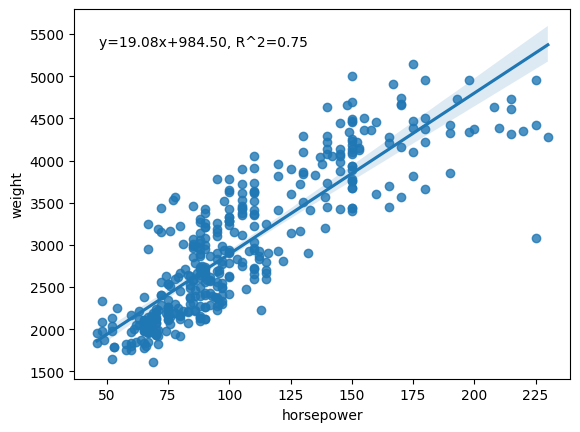

In [46]:
fig, ax = plt.subplots()
sns.regplot(x='horsepower', y='weight', data=df, ax=ax)
ax.text(
    x=0.05, y=0.9,
    s='y={:.2f}x+{:.2f}, R^2={:.2f}'.format(s, i, r**2),
    transform=ax.transAxes
)

In [47]:
fig = px.scatter(
    df, x='horsepower', y='weight', width=500, height=400,
    trendline='ols'
)

results = px.get_trendline_results(fig)
results = results.iloc[0]["px_fit_results"]
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1154.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          1.36e-118
Time:                        18:16:23   Log-Likelihood:                -2929.9
No. Observations:                 392   AIC:                             5864.
Df Residuals:                     390   BIC:                             5872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        984.5003     62.514     15.748      0.0

In [48]:
results.params

array([984.50032677,  19.07816155])

In [49]:
fig = px.scatter(
    df, x='horsepower', y='weight', width=500, height=400,
    trendline='ols'
)

fig.add_annotation(
    text='y= {:.1f}x + {:.1f}, R^2={:.2f}'.format(results.params[1], results.params[0], results.rsquared),
    x=0.05, y=0.95, xref='x domain', yref='y domain', showarrow=False
)

fig.show()

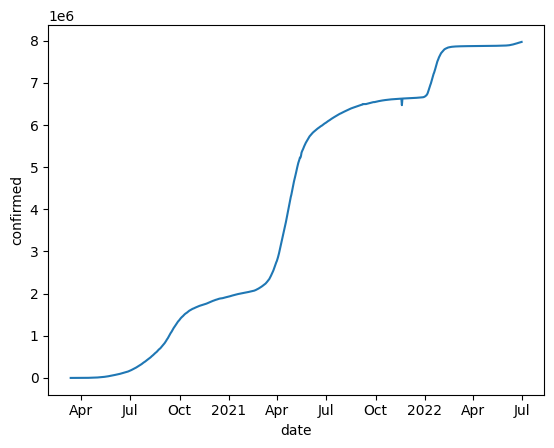

In [50]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Covid19-India/Covid19-India.csv')
df['date'] = pd.to_datetime(df['date'])
df= df.loc[df.region=='Maharashtra']

fig, ax= plt.subplots()
sns.lineplot(x='date', y='confirmed', data=df, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

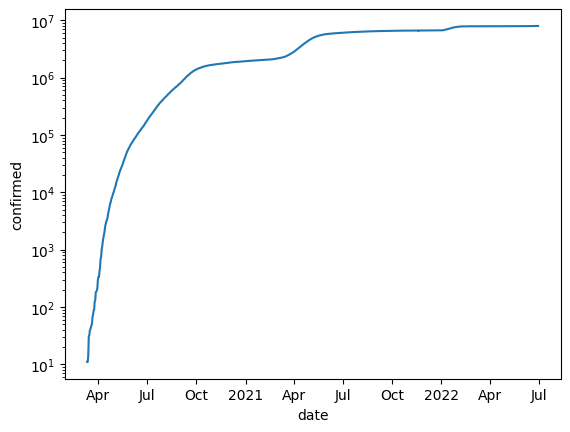

In [51]:
fig, ax= plt.subplots()
sns.lineplot(x='date', y='confirmed', data=df, ax=ax)
ax.xaxis.set_major_formatter(mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
ax.set_yscale('log')

In [52]:
fig = px.line(
    df, x='date', y='confirmed', width=500, height=400, log_y=True
)
fig.show()

<Axes: xlabel='total_bill', ylabel='tip'>

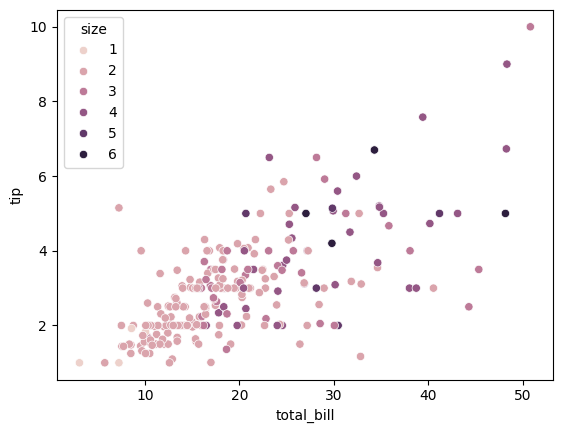

In [53]:
df = sns.load_dataset('tips')

fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='size'
)

<Axes: xlabel='total_bill', ylabel='tip'>

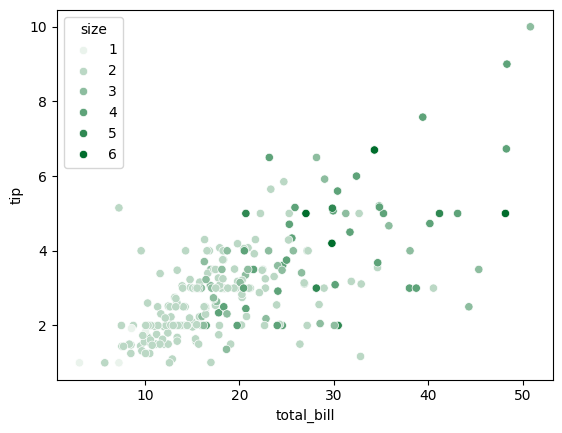

In [54]:
color = sns.color_palette("light:#006d2c", as_cmap=True)

fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='size', palette=color
)

<Axes: xlabel='total_bill', ylabel='tip'>

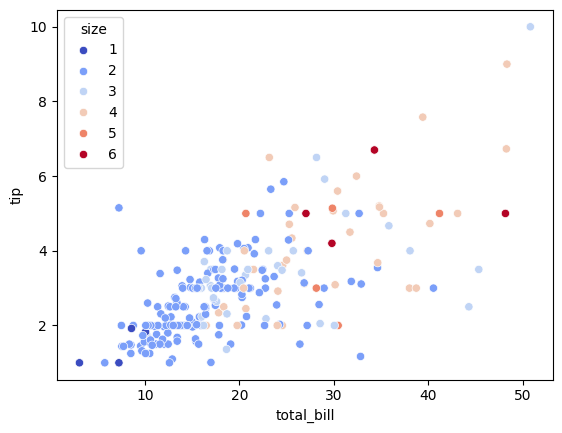

In [55]:
color = sns.color_palette("coolwarm", as_cmap=True)

fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='size', palette=color
)

<Axes: xlabel='total_bill', ylabel='tip'>

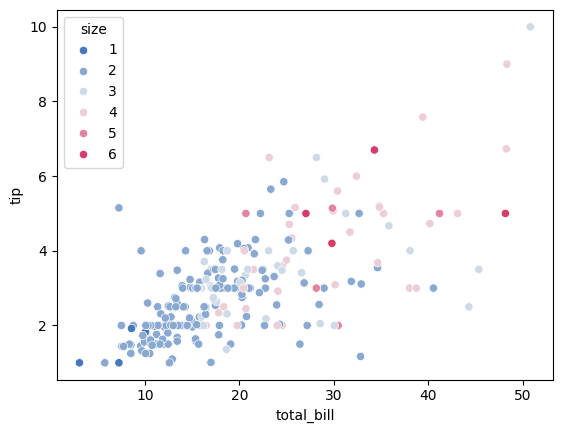

In [56]:
color = sns.diverging_palette(250, 0, as_cmap=True)

fig, ax= plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='size', palette=color
)

<Axes: xlabel='total_bill', ylabel='tip'>

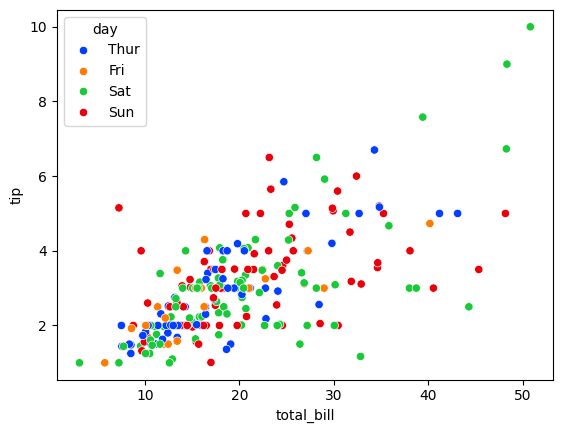

In [57]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='day', palette='bright'
)

<Axes: xlabel='total_bill', ylabel='tip'>

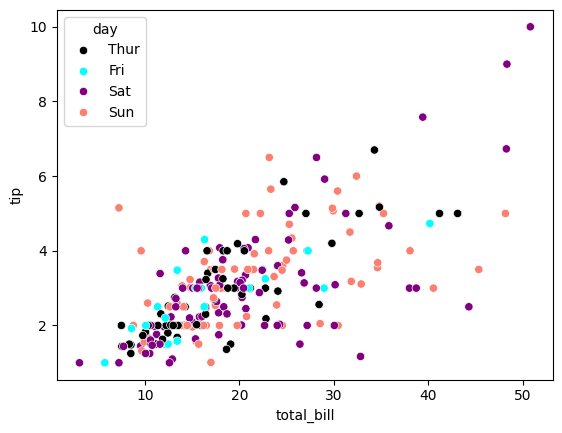

In [58]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='day', hue_order=['Thur', 'Fri', 'Sat', 'Sun'],
    palette=['black','cyan','purple','salmon']
)

<Axes: xlabel='total_bill', ylabel='tip'>

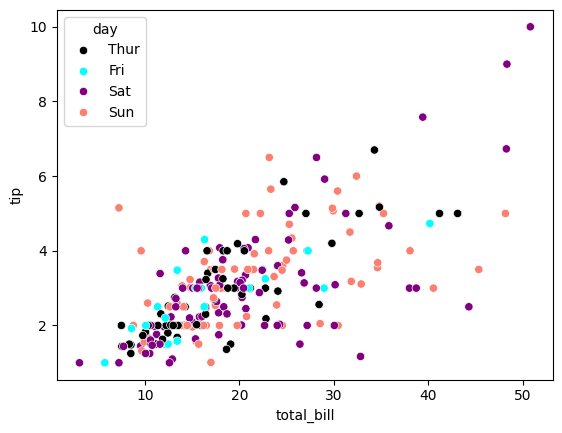

In [59]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='day', palette={'Thur':'black', 'Fri':'cyan', 'Sat':'purple', 'Sun':'salmon'}
)

<Axes: xlabel='total_bill', ylabel='tip'>

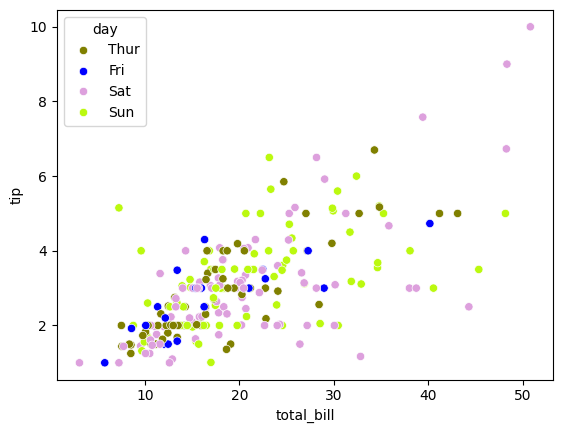

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(
    x='total_bill', y='tip', data=df, ax=ax,
    hue='day', palette={'Thur':'#808000', 'Fri':'#0000FF', 'Sat':'#DDA0DD','Sun':'#BBF90F'}
)

In [61]:
df = sns.load_dataset('diamonds')
pivot = df.pivot_table(index='color', columns='clarity', values='price')
clarity_order = ['I1', 'SI2', 'SI1','VS2','VS1','VVS2','VVS1','IF']

<Axes: xlabel='clarity', ylabel='color'>

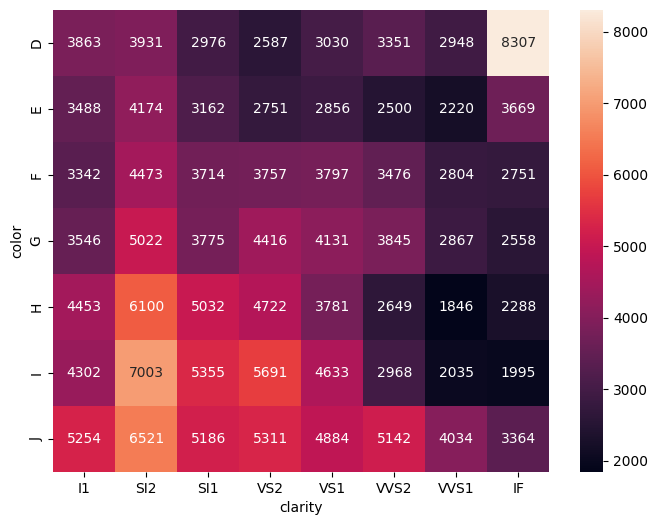

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(pivot[clarity_order], annot=True, fmt='.0f')

<Axes: xlabel='clarity', ylabel='color'>

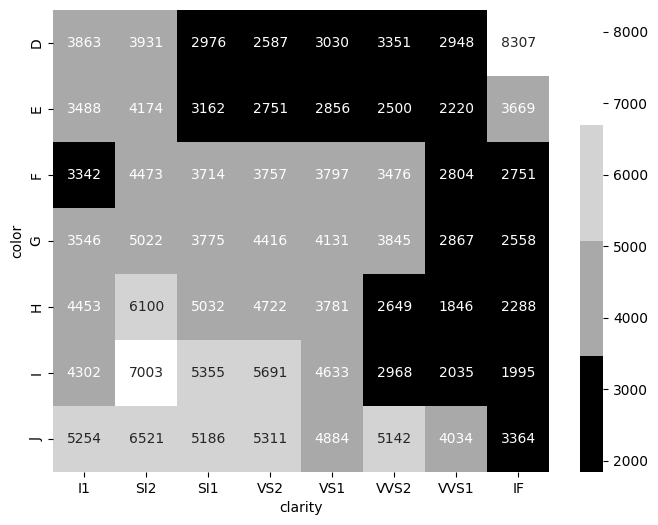

In [64]:
fig, ax= plt.subplots(figsize=(8,6))
sns.heatmap(
    pivot[clarity_order], annot=True, fmt='.0f',
    cmap=['black', 'darkgrey', 'lightgrey', 'white']
)

<Axes: xlabel='clarity', ylabel='color'>

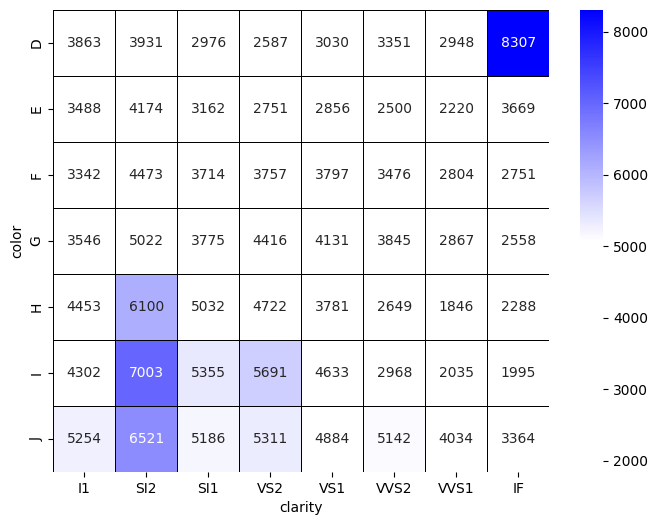

In [65]:
from matplotlib.colors import LinearSegmentedColormap

color = LinearSegmentedColormap.from_list(
    'custom color',
    [(0, '#ffffff'),
     (0.5, '#ffffff'),
     (1, '#0000ff')], N=256
)

fig, ax=plt.subplots(figsize=(8,6))
sns.heatmap(
    pivot[clarity_order], annot=True, fmt='.0f',
    linewidth=0.5, linecolor='black', cmap=color
)

In [66]:
fig = px.colors.qualitative.swatches()
fig.show()

In [67]:
fig = px.colors.sequential.swatches_continuous()
fig.show()

In [68]:
fig = px.colors.diverging.swatches_continuous()
fig.show()

In [69]:
fig = px.colors.cyclical.swatches_continuous()
fig.show()

In [71]:
df = sns.load_dataset('tips')

fig = px.scatter(
    df, x='total_bill', y='tip', width=500, height=400,
    color='size', color_continuous_scale='balance'
)

fig.show()

In [72]:
fig = px.scatter(
    df, x='total_bill', y='tip', width=500, height=400,
    color='day', color_discrete_sequence=px.colors.qualitative.Light24
)
fig.show()

In [73]:
fig = px.scatter(
    df, x='total_bill', y='tip', width=500, height=400,
    color='day', color_discrete_map={'Thur':'black', 'Fri':'cyan','Sat':'purple', 'Sun':'salmon'}
)
fig.show()

In [74]:
fig = px.scatter(
    df, x='total_bill', y='tip', width=500, height=400,
    color='day',
    color_discrete_sequence=[
        'rgb(255, 255, 255)',
        'rgb(0, 0, 0)',
        'rgb(128, 128, 128)',
        'rgb(64, 255, 192)'
    ]
)
fig.show()

In [75]:
df = sns.load_dataset('diamonds')
pivot = df.pivot_table(index='color', columns='clarity', values='price')
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

colors = ['black','darkgrey','lightgrey','white']
fig=px.imshow(
    pivot[clarity_order], width=500, height=400, text_auto='4d',
    color_continuous_scale=colors
)
fig.show()

In [76]:
fig = px.imshow(
    pivot[clarity_order], width=500, height=400, text_auto='4d',
)

fig.update_coloraxes(
    showscale=True,
    colorscale=[
        (0.0, '#FFFFFF'),
        (0.5, '#FFFFFF'),
        (1, '#0000FF'),
    ],
)

fig.show()